In [5]:
# tensorflow.GradientTape() => 用來計算張量的微分
import tensorflow as tf
X = tf.constant([[1.,2.],[3.,4.]])
y = tf.constant([[1.],[2.]])
w = tf.Variable(initial_value=[[1.],[2.]])
b = tf.Variable(initial_value=1.)

with tf.GradientTape() as tape:
    L = tf.reduce_sum(tf.square(tf.matmul(X,w)+b-y))
w_grad, b_grad = tape.gradient(L,[w,b])

print(L, w_grad, b_grad)

tf.Tensor(125.0, shape=(), dtype=float32) tf.Tensor(
[[ 70.]
 [100.]], shape=(2, 1), dtype=float32) tf.Tensor(30.0, shape=(), dtype=float32)


In [6]:
from tensorflow.keras.datasets import mnist
(train_Data, train_Label), (test_Data, test_Label) = mnist.load_data()

print('train data=', len(train_Data))
print('test data=', len(test_Data))
print('train data dim=', train_Data.shape)
print('train label dim=', train_Label.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
train data= 60000
test data= 10000
train data dim= (60000, 28, 28)
train label dim= (60000,)


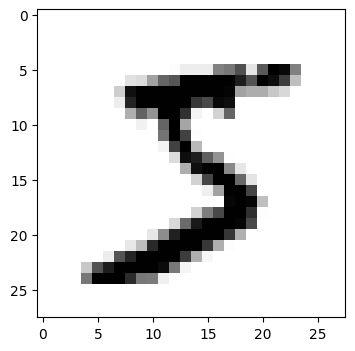

In [7]:
import matplotlib.pyplot as plt  

def plot_image(data):  
    fig = plt.gcf()
    fig.set_size_inches(4,4)  
    plt.imshow(data, cmap='binary')  
    plt.show() 

plot_image(train_Data[0])

In [11]:
import tensorflow as tf

learning_rate = 0.01     
training_epoch = 1000    
batch_size = 2000         

train_Data_R, test_Data_R = train_Data.reshape([-1, 784]).astype('float32')\
    ,test_Data.reshape([-1, 784]).astype('float32')
train_Data_R, test_Data_R = train_Data_R / 255., test_Data_R / 255.
train_Data_M = tf.data.Dataset.from_tensor_slices((train_Data_R, train_Label))
train_Data_M = train_Data_M.shuffle(5000).batch(batch_size)

In [13]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [14]:
optimizer = tf.keras.optimizers.SGD(learning_rate)

In [16]:
def cross_entropy_loss(x, y):
    y = tf.cast(y, tf.int64)
    loss = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=x)
    return tf.reduce_mean(loss)

def accuracy(y_pred, y_true):
    correct_prediction = tf.equal(tf.argmax(y_pred, 1),
                                  tf.cast(y_true, tf.int64))
    return tf.reduce_mean(tf.cast(correct_prediction,
                                  tf.float32), axis=-1)

In [17]:
testlossArr = []   
testaccArr = []   
epochs = []   
Testloss = 0  
Testacc = 0   
epoch = 0
for epoch in range(training_epoch):
    for step, (batch_data, batch_label) in enumerate(train_Data_M):
        with tf.GradientTape() as tape:
            pre_data = model(batch_data)
            loss = cross_entropy_loss(pre_data, batch_label)
            acc = accuracy(pre_data, batch_label)
            trainable_variables = model.trainable_variables
        gradients = tape.gradient(loss, trainable_variables)
        optimizer.apply_gradients(zip(gradients, trainable_variables))
    
    Testprec = model(test_Data_R)
    Testloss = cross_entropy_loss(Testprec, test_Label)
    Testacc = accuracy(Testprec, test_Label)
    print("Testloss: %f, Testaccuracy: %f" % (Testloss, Testacc))
    print(epoch)
    testlossArr.append(Testloss)
    testaccArr.append(Testacc)
    epochs.append(epoch)

Testloss: 2.302697, Testaccuracy: 0.096700
0
Testloss: 2.301444, Testaccuracy: 0.110300
1
Testloss: 2.300130, Testaccuracy: 0.125500
2
Testloss: 2.298745, Testaccuracy: 0.144700
3
Testloss: 2.297278, Testaccuracy: 0.167400
4
Testloss: 2.295718, Testaccuracy: 0.193900
5
Testloss: 2.294051, Testaccuracy: 0.224900
6
Testloss: 2.292255, Testaccuracy: 0.254600
7
Testloss: 2.290316, Testaccuracy: 0.284100
8
Testloss: 2.288201, Testaccuracy: 0.313200
9
Testloss: 2.285874, Testaccuracy: 0.332300
10
Testloss: 2.283281, Testaccuracy: 0.345200
11
Testloss: 2.280355, Testaccuracy: 0.350500
12
Testloss: 2.277008, Testaccuracy: 0.350600
13
Testloss: 2.273135, Testaccuracy: 0.346300
14
Testloss: 2.268625, Testaccuracy: 0.335600
15
Testloss: 2.263406, Testaccuracy: 0.324400
16
Testloss: 2.257497, Testaccuracy: 0.317800
17
Testloss: 2.251053, Testaccuracy: 0.314000
18
Testloss: 2.244307, Testaccuracy: 0.314400
19
Testloss: 2.237393, Testaccuracy: 0.322500
20
Testloss: 2.230312, Testaccuracy: 0.335500
2

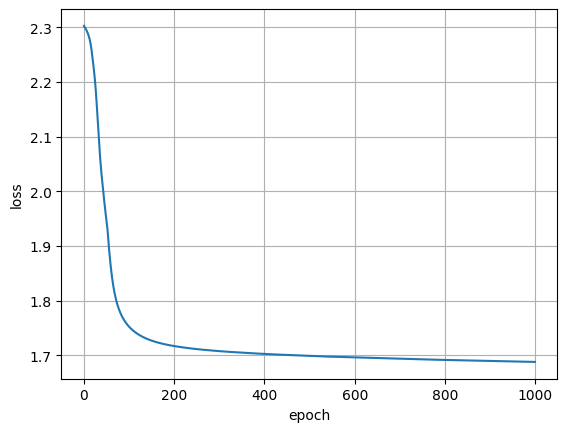

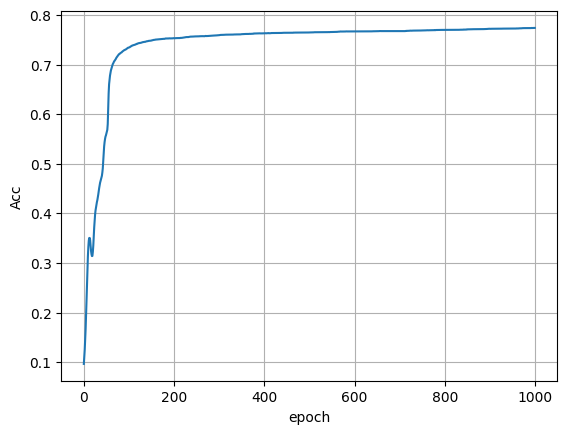

In [19]:
plt.plot(epochs,testlossArr)
plt.xlabel("epoch")
plt.ylabel("loss")
plt.grid()
plt.show()
plt.plot(epochs,testaccArr)
plt.xlabel("epoch")
plt.ylabel("Acc")
plt.grid()
plt.show()

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
(train_Data, train_Label), (test_Data, test_Label) = mnist.load_data()

model = Sequential([
    layers.Flatten(input_shape=(28, 28)),   
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax') 
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_Data, train_Label, validation_split=0.25, 
                    epochs=50, batch_size=16, verbose=1)
model.evaluate(test_Data, test_Label, verbose=2)

Epoch 1/50


c:\Users\a0903\Code\PySyntax\env\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2813/2813 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8114 - loss: 3.5066 - val_accuracy: 0.9241 - val_loss: 0.3226
Epoch 2/50
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9318 - loss: 0.2498 - val_accuracy: 0.9453 - val_loss: 0.1921
Epoch 3/50
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9469 - loss: 0.1838 - val_accuracy: 0.9539 - val_loss: 0.1687
Epoch 4/50
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9608 - loss: 0.1441 - val_accuracy: 0.9550 - val_loss: 0.1601
Epoch 5/50
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9654 - loss: 0.1292 - val_accuracy: 0.9374 - val_loss: 0.2413
Epoch 6/50
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9705 - loss: 0.1065 - val_accuracy: 0.9639 - val_loss: 0.1613
Epoch 7/50
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9763 - loss: 0.0890 - val_accuracy: 0.9625 - val_loss: 0.1670
Epoch 8/50
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9783 - loss: 0.0836 - val_accurac

[0.505242109298706, 0.9714000225067139]